# Problem Statement:

An automobile parts manufacturing company has collected data on transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your data science skills to find the underlying buying patterns of the customers, provide the company with suitable insights about their customers, and recommend customized marketing strategies for different segments of customers.

#### Import the All Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

inline = %matplotlib inline

##### Import the dataset into Data Frame

In [ ]:
df = pd.read_excel('Sales_Data.xlsx')

##### Count of Rows and Columns

In [ ]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 2747
Number of Columns: 20


##### Check the Data Types and columns details

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

##### Check the Summary Stats Details

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ORDERNUMBER,2747.0,10259.761558,10100.0,10181.0,10264.0,10334.5,10425.0,91.877521
QUANTITYORDERED,2747.0,35.103021,6.0,27.0,35.0,43.0,97.0,9.762135
PRICEEACH,2747.0,101.098951,26.88,68.745,95.55,127.1,252.87,42.042548
ORDERLINENUMBER,2747.0,6.491081,1.0,3.0,6.0,9.0,18.0,4.230544
SALES,2747.0,3553.047583,482.13,2204.35,3184.8,4503.095,14082.8,1838.953901
ORDERDATE,2747,2019-05-13 21:56:17.211503360,2018-01-06 00:00:00,2018-11-08 00:00:00,2019-06-24 00:00:00,2019-11-17 00:00:00,2020-05-31 00:00:00,NaN
DAYS_SINCE_LASTORDER,2747.0,1757.085912,42.0,1077.0,1761.0,2436.5,3562.0,819.280576
MSRP,2747.0,100.691664,33.0,68.0,99.0,124.0,214.0,40.114802


##### Find out the Null values

In [ ]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
DAYS_SINCE_LASTORDER,0
STATUS,0
PRODUCTLINE,0
MSRP,0


There are no Null Values in dataset

#### Find out the Outliers

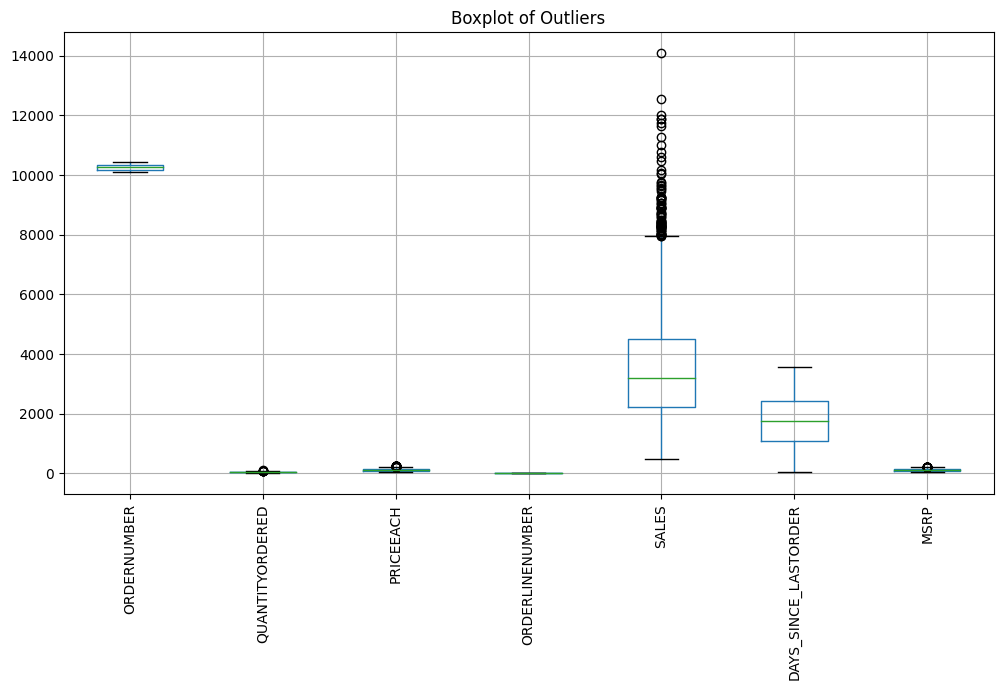

In [ ]:
df.boxplot(figsize=(12, 6), rot=90)
plt.title("Boxplot of Outliers")
plt.xticks(rotation=90)
plt.show()

Sales has lot of data points outside the whisker from upper quartile.Quantity Ordered, MSRP, and Price Each also have some values outside the whisker from upper quartile


#### Find out the Unique values

In [ ]:
# Columns to find Unique values
columns = ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'DEALSIZE']

# Loop through each column and print unique values
for col in columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values} \n")

STATUS: ['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved'] 

PRODUCTLINE: ['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains'] 

PRODUCTCODE: ['S10_1678' 'S10_1949' 'S10_2016' 'S10_4698' 'S10_4757' 'S10_4962'
 'S12_1099' 'S12_1108' 'S12_1666' 'S12_2823' 'S12_3148' 'S12_3380'
 'S12_3891' 'S12_3990' 'S12_4473' 'S12_4675' 'S18_1097' 'S18_1129'
 'S18_1342' 'S18_1367' 'S18_1589' 'S18_1662' 'S18_1749' 'S18_1889'
 'S18_1984' 'S18_2238' 'S18_2248' 'S18_2319' 'S18_2325' 'S18_2432'
 'S18_2581' 'S18_2625' 'S18_2795' 'S18_2870' 'S18_2949' 'S18_2957'
 'S18_3029' 'S18_3136' 'S18_3140' 'S18_3232' 'S18_3259' 'S18_3278'
 'S18_3320' 'S18_3482' 'S18_3685' 'S18_3782' 'S18_3856' 'S18_4027'
 'S18_4409' 'S18_4522' 'S18_4600' 'S18_4668' 'S18_4721' 'S18_4933'
 'S24_1046' 'S24_1444' 'S24_1578' 'S24_1628' 'S24_1785' 'S24_1937'
 'S24_2000' 'S24_2011' 'S24_2022' 'S24_2300' 'S24_2360' 'S24_2766'
 'S24_2840' 'S24_2841' 'S24_2887' 'S24_2972' 'S24_3151' 'S24_319

There are no duplicates values in dataset.

#### UNIVARAITE ANALYSIS

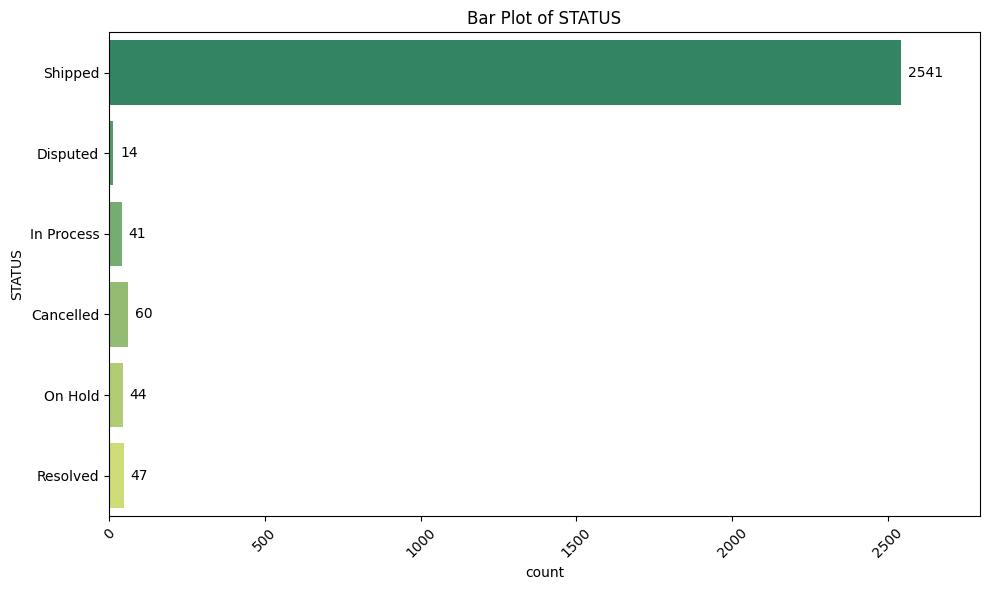

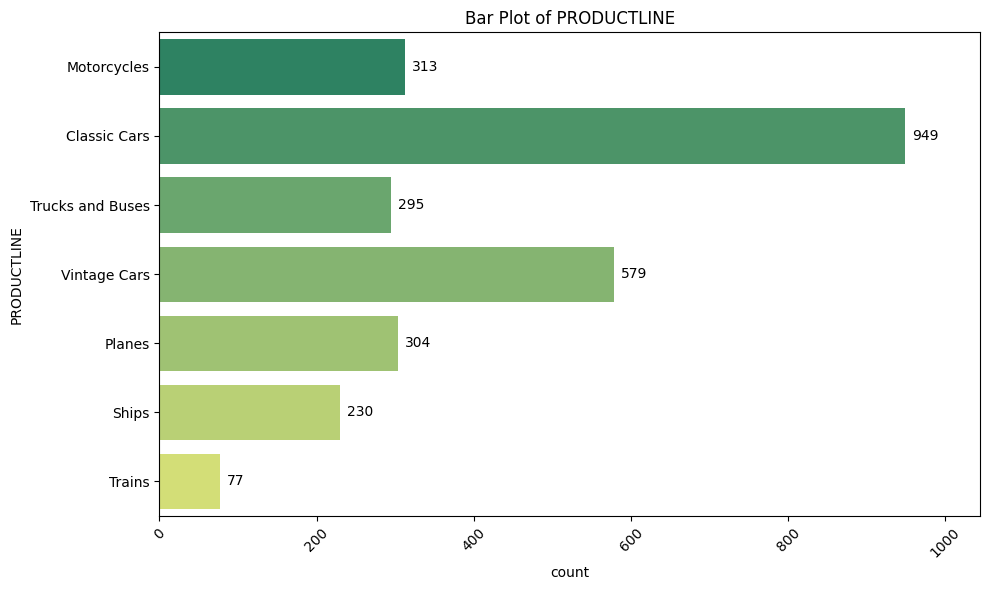

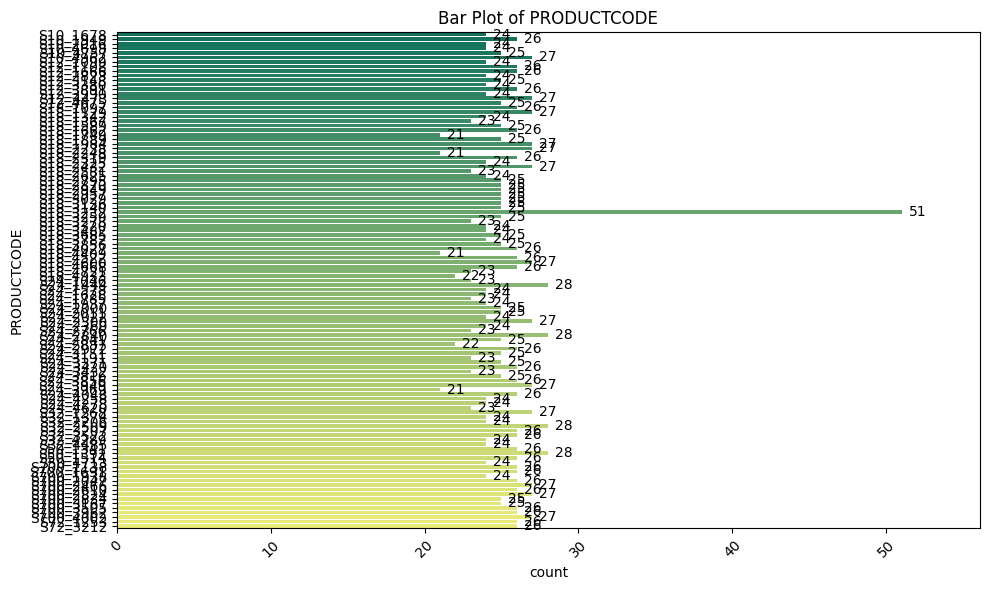

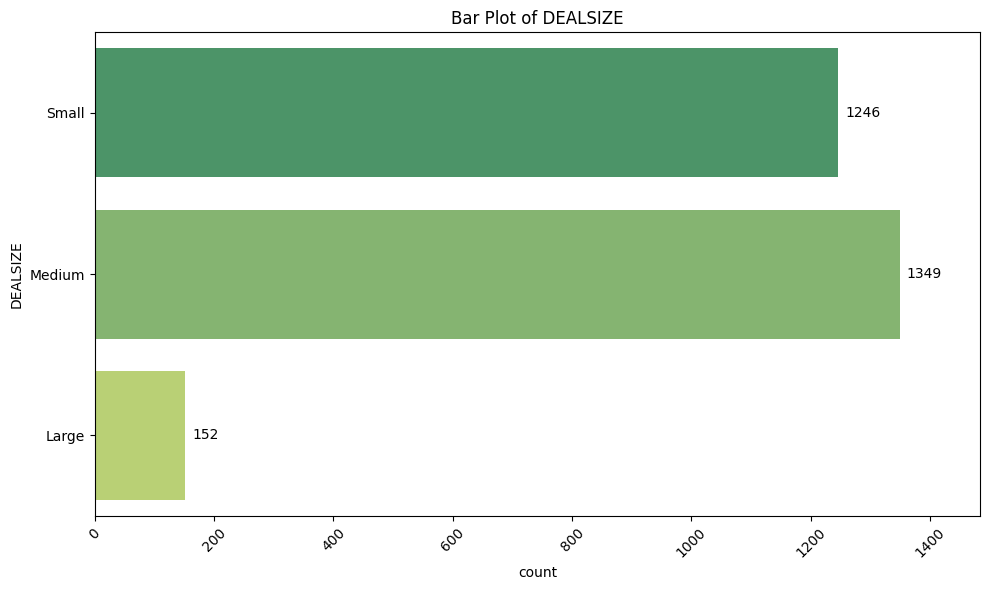

In [ ]:
# Loop through each column
for col in columns:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    ax = sns.countplot(y=df[col], palette='summer')  # Countplot to show frequency of each unique value

    # Annotating bars with the counts
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=5, fmt='%d')  # Add count labels to the end of each bar

    # Adjust x-axis limits to give enough space for labels
    max_count = df[col].value_counts().max()
    ax.set_xlim(0, max_count * 1.1)  # Increase the limit slightly to fit the labels

    plt.title(f"Bar Plot of {col}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Ensure proper spacing
    plt.show()


QUANTITYORDERED Description:
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

PRICEEACH Description:
count    2747.000000
mean      101.098951
std        42.042548
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64

SALES Description:
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64

MSRP Description:
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64


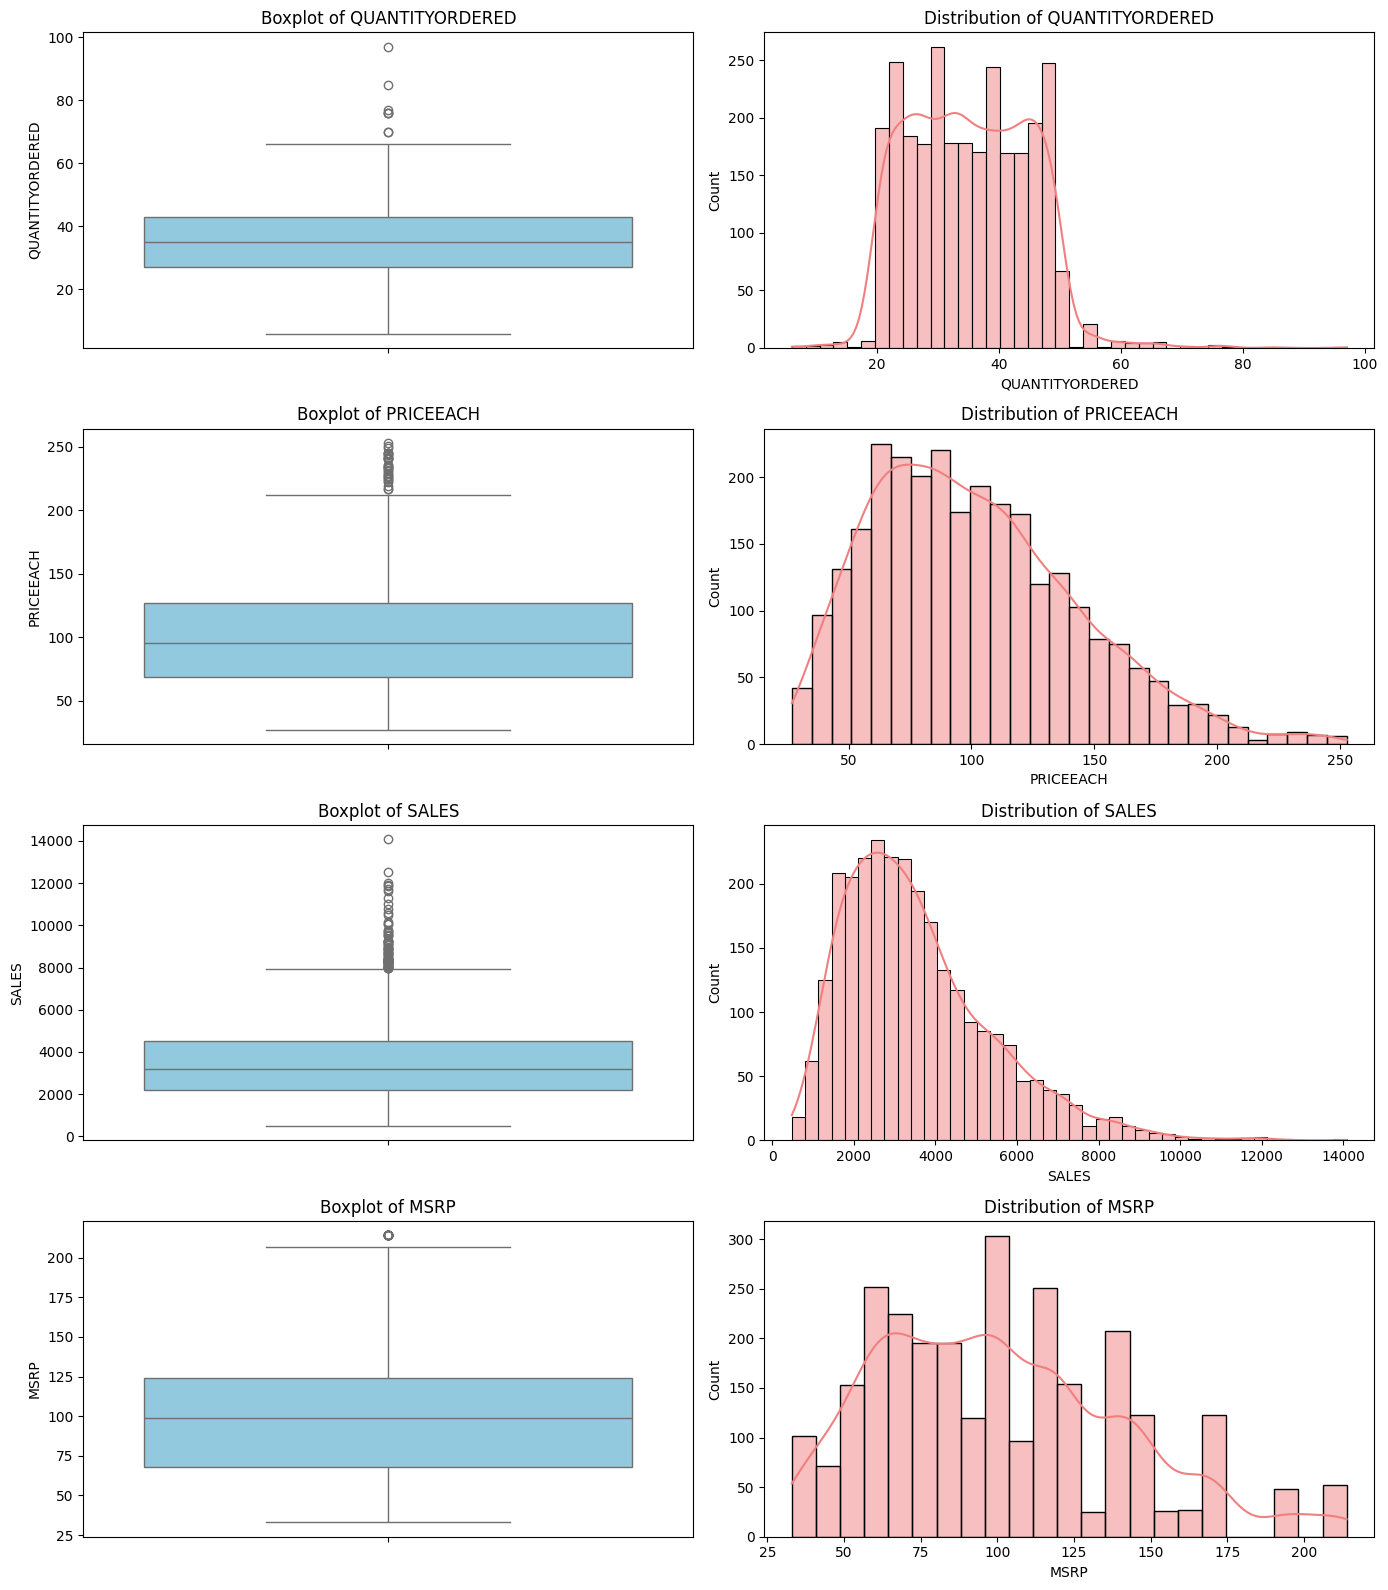

In [ ]:
# List of numeric columns
numeric_columns = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# Create a 3x2 figure layout for boxplots and histograms
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

# Loop through numeric columns to create boxplots and histograms
for i, column in enumerate(numeric_columns):
    # Print descriptive statistics
    print(f'\n{column} Description:')
    print(df[column].describe())

    # Boxplot on the left side (subplot in column 0)
    sns.boxplot(ax=axes[i, 0], data=df[column], color='skyblue')
    axes[i, 0].set_title(f'Boxplot of {column}')

    # Histogram with KDE on the right side (subplot in column 1)
    sns.histplot(ax=axes[i, 1], data=df[column], kde=True, color='lightcoral')
    axes[i, 1].set_title(f'Distribution of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Bivariate Analysis

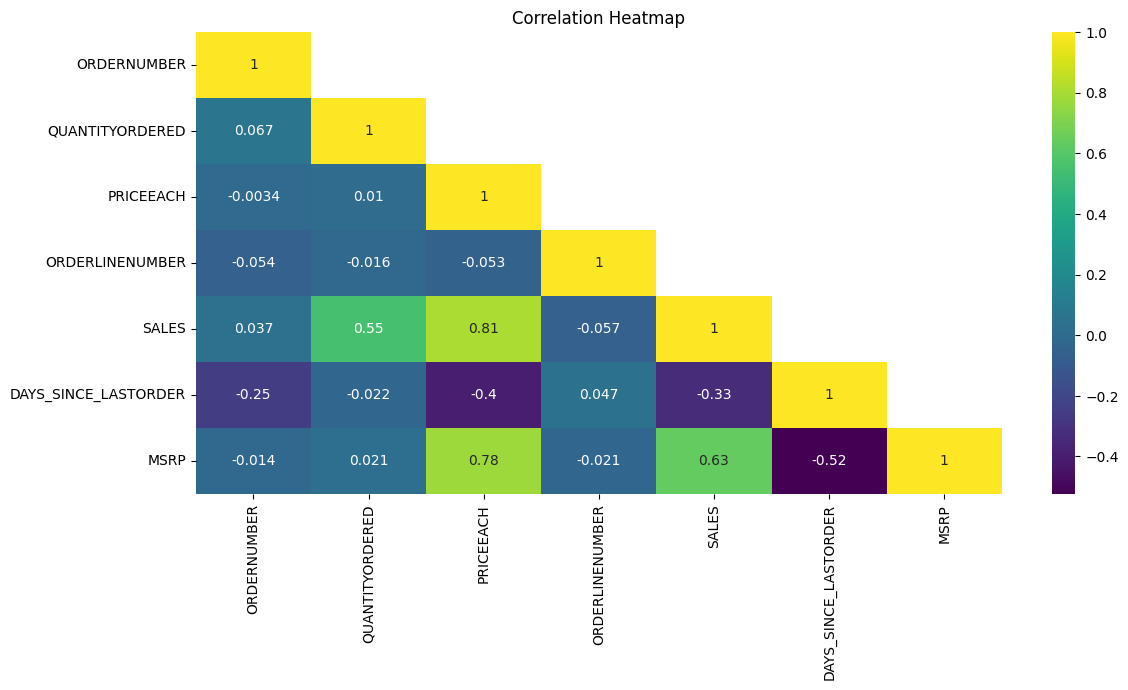

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap of correlation matrix
plt.figure(figsize=(13, 6))
sns.heatmap(numeric_df.corr(), annot=True, mask=np.triu(numeric_df.corr(), +1), cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

1 - Strong positive correlations:

•	SALES and QUANTITYORDERED have a strong positive correlation, which makes sense as the more items ordered, the higher the sales will be.

•	SALES and PRICEEACH also have a strong positive correlation, indicating that higher prices lead to higher sales.

•	MSRP and PRICEEACH have a strong positive correlation, suggesting that the suggested retail price is closely related to the actual selling price.

2 - Strong negative correlations:

•	DAYS_SINCE_LASTORDER and SALES have a strong negative correlation, implying that customers who have ordered more recently are more likely to make future purchases.

3 - Weak correlations:

•	The remaining variables have weak or no correlations with each other.


Import the RFM export file for further Analysis

In [ ]:
df = pd.read_excel('MRA Project - Aman deep singh.xlsx')

In [ ]:
df.columns

Index(['CUSTOMERNAME', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE',
       'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE',
       'MONETARY', 'RECENCY', 'ORDERNUMBER', 'MONETARY [Binned]',
       'RECENCY [Binned]', 'ORDERNUMBER [Binned]', 'RECENCY_HML',
       'MONETARY_HML', 'FREQUENCY_HML', 'RFMScore'],
      dtype='object')

In [ ]:
df[['CUSTOMERNAME','RFMScore']].head(10)

,CUSTOMERNAME,RFMScore
0,"AV Stores, Co.",242
1,Alpha Cognac,412
2,Amica Models & Co.,131
3,"Anna's Decorations, Ltd",344
4,Atelier graphique,212
5,"Australian Collectables, Ltd",412
6,"Australian Collectors, Co.",344
7,"Australian Gift Network, Co",312
8,Auto Assoc. & Cie.,111
9,Auto Canal Petit,432


### Top 5 Best Customer

In [ ]:
# Filter customers with RFM Score = 444 (Highest Recency, Frequency, and Monetary)
Best_Customers = df[df['RFMScore'] == 444].sort_values(by='ORDERNUMBER', ascending=False)

# Display the selected customer data
Best_Customers = Best_Customers[['CUSTOMERNAME', 'RFMScore', 'MONETARY', 'ORDERNUMBER', 'RECENCY']].sort_values(by='RECENCY', ascending=True).sort_values(by='ORDERNUMBER', ascending=False).sort_values(by='MONETARY',ascending=False)

Best_Customers.head().style.background_gradient(cmap='summer')


,CUSTOMERNAME,RFMScore,MONETARY,ORDERNUMBER,RECENCY
32,Euro Shopping Channel,444,912294.110000,26,0
53,Mini Gifts Distributors Ltd.,444,654858.060000,17,2
43,La Rochelle Gifts,444,180124.900000,4,0
78,The Sharp Gifts Warehouse,444,160010.270000,4,39
72,Souveniers And Things Co.,444,151570.980000,4,2


Risk Customers

In [ ]:
# Filtering customers with high Recency
Lost_Customers = df[df['RECENCY_HML'] == 2].sort_values(by='ORDERNUMBER', ascending=False).sort_values(by='MONETARY',ascending=False)


# Selecting specific columns for the final view
Lost_Customers = Lost_Customers[['CUSTOMERNAME', 'RFMScore', 'MONETARY', 'ORDERNUMBER', 'RECENCY']]

# Display top 5 lost customers with a color gradient for better visibility
Lost_Customers.head().style.background_gradient(cmap='cividis_r')


,CUSTOMERNAME,RFMScore,MONETARY,ORDERNUMBER,RECENCY
44,Land of Toys Inc.,244,164069.440000,4,198
0,"AV Stores, Co.",242,157807.810000,3,196
64,Rovelli Gifts,242,137955.720000,3,201
57,Online Diecast Creations Co.,242,131685.300000,3,209
23,"Corrida Auto Replicas, Ltd",242,120615.280000,3,212


#### Top 5 Lost Customers

In [ ]:
Lost_Customers = df[df['RFMScore'] == 111]
Lost_Customers = Lost_Customers[['CUSTOMERNAME', 'RFMScore', 'MONETARY', 'ORDERNUMBER', 'RECENCY']].sort_values(by='RECENCY', ascending=False)
Lost_Customers.head().style.background_gradient(cmap='cividis_r')

,CUSTOMERNAME,RFMScore,MONETARY,ORDERNUMBER,RECENCY
29,"Double Decker Gift Stores, Ltd",111,36019.040000,2,495
87,West Coast Collectables Co.,111,46084.640000,2,488
70,Signal Collectibles Ltd.,111,50218.510000,2,476
25,Daedalus Designs Imports,111,69052.410000,2,465
15,CAF Imports,111,49642.050000,2,439


Top 5 Loyal Customers

In [ ]:
Loyal_customer = df[df['FREQUENCY_HML']== 4]
Loyal_customer =  Loyal_customer[['CUSTOMERNAME', 'RFMScore', 'MONETARY', 'ORDERNUMBER', 'RECENCY']].sort_values(by='RECENCY', ascending=True).sort_values(by='ORDERNUMBER', ascending=False).sort_values(by='MONETARY',ascending=False)
Loyal_customer.head().style.background_gradient(cmap='summer')

,CUSTOMERNAME,RFMScore,MONETARY,ORDERNUMBER,RECENCY
32,Euro Shopping Channel,444,912294.110000,26,0
53,Mini Gifts Distributors Ltd.,444,654858.060000,17,2
6,"Australian Collectors, Co.",344,200995.410000,5,184
55,Muscle Machine Inc,344,197736.940000,4,182
43,La Rochelle Gifts,444,180124.900000,4,0


# END OF PROJECT

# Problem Statement:

A grocery store shared the transactional data with you. Your job is to conduct a thorough analysis of Point of Sale (POS) data, identify the most commonly occurring sets of items in the customer orders, and provide recommendations through which a grocery store can increase its revenue by popular combo offers & discounts for customers.

#### All Required Libraries already Imported

Import the dataset into Data Frame

In [4]:
data = pd.read_csv('dataset_group.csv')

Count of Rows and Columns

In [5]:
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 20641
Number of Columns: 3


Check the Data Types and columns details

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


##### Check the Summary Stats Details

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


Find out the Null values

In [9]:
data.isnull().sum()

,0
Date,0
Order_id,0
Product,0


Check the Top 5 Rows

In [10]:
data.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


Find out the Unique values

In [11]:
data['Product'].nunique()

37

In [12]:
data['Order_id'].nunique()

1139

Find the Duplicate

In [15]:
data.duplicated().sum()

4730

Drop Duplicate data

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.columns

Index(['Date', 'Order_id', 'Product'], dtype='object')

In [24]:
data.to_csv('data.csv', index=False)